In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rfest import splineLNLN, build_design_matrix
from rfest.MF import semiNMF, KMeans

import pickle

We use data from Rust et al. (2005), taken from this Github repo: https://github.com/pillowlab/subunit_mele

In [2]:
import h5py

with h5py.File('./data/rust_et_al_2005/544l029.p21_stc.mat', 'r') as f:
    data = {key:f[key][:] for key in f.keys() if key != '#refs#'}
    stim = data['stim'].T
    dt = data['stim_tms'][0][1] - data['stim_tms'][0][0]
    X = build_design_matrix(stim, 16)
    y = np.ravel(data['spikes_per_frm'])

    del data
    
dims = [16, 24]

In [3]:
lnln_kms = splineLNLN(X, y, dims=dims, df=13, dt=0.1)
lnln_kms.fit(p0='kmeans', num_iters=200, num_iters_init=100, num_subunits=5, alpha=1, lambd=0.5, verbal=20, step_size=0.1)

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Initializing subunits with K-means clustering...
Iter	Cost
0	1.357
20	0.994
40	0.994
60	0.994
80	0.994
Stop: reached maximum iterations. Final cost = 0.994
Finished Initialization. 

Iter	Cost	
0	270481.862	
20	250931.737	
40	249467.544	
60	249275.987	
80	249233.773	
100	249205.085	
120	249172.934	
140	249147.349	
160	249130.699	
180	249120.325	
Stop: reached 200 steps, final cost=249115.02484.


In [4]:
lnln_nmf = splineLNLN(X, y, dims=dims, df=13, dt=0.1)
lnln_nmf.fit(p0='seminmf', num_iters=200, num_iters_init=100, num_subunits=5, alpha=1, lambd=0.5, verbal=20, step_size=0.1)

Initializing subunits with semi-NMF...
Initializing semiNMF with `random`...
Finished semiNMF initialization.
Iter	Cost
0	0.999
20	0.995
40	0.995
60	0.995
80	0.995
Stop: reached maximum iterations. Final cost = 0.995
Finished Initialization. 

Iter	Cost	
0	292627.661	
20	251852.691	
40	249528.484	
60	249208.924	
80	249152.385	
100	249137.768	
120	249131.474	
140	249127.455	
160	249124.135	
180	249120.780	
Stop: reached 200 steps, final cost=249117.26855.


In [5]:
lnln_rnd = splineLNLN(X, y, dims=dims, df=13, dt=0.1)
lnln_rnd.fit(num_iters=1200, num_subunits=5, alpha=1, lambd=0.5, verbal=100, step_size=0.1)

Randomly initializing subunits...
Finished Initialization. 

Iter	Cost	
0	328834.012	
100	249156.857	
200	249108.599	
300	249094.077	
400	249083.168	
500	249082.224	
Stop at 524 steps: cost has been monotonically increasing for 10 steps.


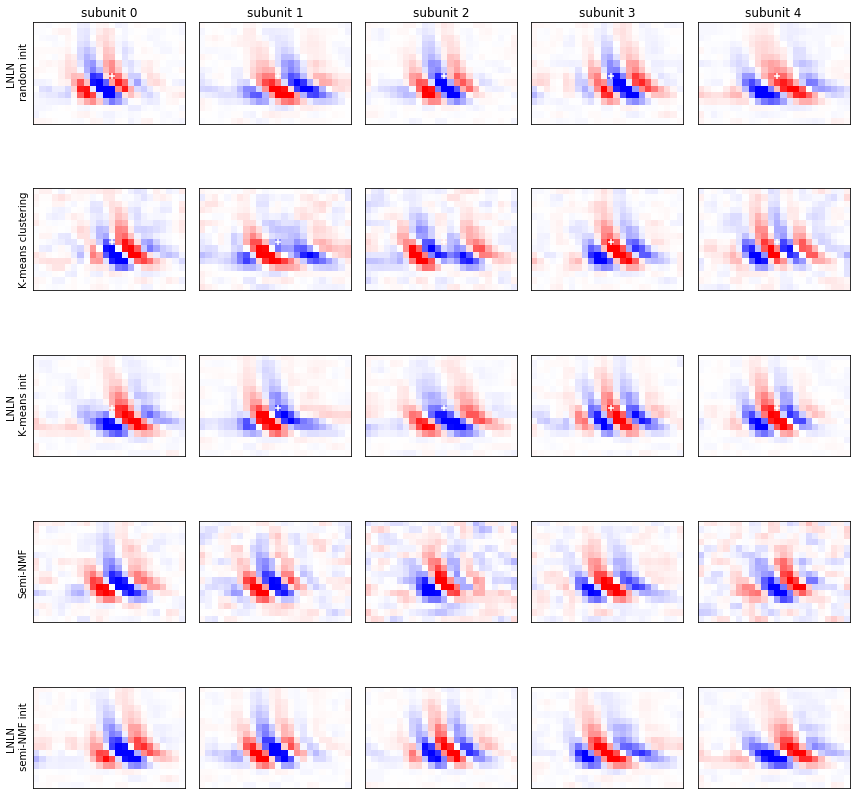

In [6]:
def norm(x):
    return x / np.linalg.norm(x)

num_subunits = 5

fig, ax = plt.subplots(5,5, figsize=(12, 12))
for i in range(num_subunits):
    
    ksub = lnln_rnd.w_opt[:, i].reshape(dims)
    sRF = norm(ksub)
    
    ax[0, i].set_title('subunit {}'.format(i))

    ax[0, i].imshow(sRF.reshape(dims), cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    
    ksub = lnln_kms.w_kms[:, i].reshape(dims)
    sRF = norm(ksub)    

    ax[1, i].imshow(sRF.reshape(dims), cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
    
    ksub = lnln_kms.w_opt[:, i].reshape(dims)
    sRF = norm(ksub)    

    ax[2, i].imshow(sRF.reshape(dims), cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax[2, i].set_xticks([])
    ax[2, i].set_yticks([])
    
    ksub = lnln_nmf.w_nmf[:, i].reshape(dims)
    sRF = norm(ksub)    

    ax[3, i].imshow(sRF.reshape(dims), cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax[3, i].set_xticks([])
    ax[3, i].set_yticks([])

    ksub = lnln_nmf.w_opt[:, i].reshape(dims)
    sRF = norm(ksub)    

    ax[4, i].imshow(sRF.reshape(dims), cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax[4, i].set_xticks([])
    ax[4, i].set_yticks([])
    
for j in range(3):
    for i in range(num_subunits):
        ax[j, i].scatter(dims[1]/2, dims[0]/2, color='white', marker='+')
    
ax[0, 0].set_ylabel('LNLN \n random init')
ax[1, 0].set_ylabel('K-means clustering')
ax[2, 0].set_ylabel('LNLN \n K-means init')
ax[3, 0].set_ylabel('Semi-NMF')
ax[4, 0].set_ylabel('LNLN \n semi-NMF init') 

fig.tight_layout()